In [8]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import Input, MaxPooling2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, Softmax
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
import numpy as np
import matplotlib.pyplot as plt 
import h5py

In [28]:
#"phenomene","pitch","tension","breathiness","voicing","gender","toneshift"
N=10500
data_path='C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\dataset2\\'
data_x=np.zeros(shape=(N,128,128,1),dtype=(np.float))
for i in range(N):
    if (i/N*100)%5==0:
        print('%d'%(i/N*100)+'%')
    t=h5py.File(data_path+'%05d.mat'%(i+1))
    t=t['MEL'][:]
    t=np.log(t+1e-20)+40
    data_x[i,:,:,0]=t
print(np.shape(data_x))

f=open(data_path+'params.txt')
range_param=[[-1,1],[-1,1],[0.2,1],[-0.1,0.1],[-400,400]]
data_y=[];
for line in f:
    data_y.append(line.split())
    data_y[-1]=data_y[-1][4:]
    for i in range(5):
        data_y[-1][i]=(float(data_y[-1][i])-range_param[i][0])/(range_param[i][1]-range_param[i][0])
    data_y.append(data_y[-1])
    data_y.append(data_y[-1])
data_y=np.array(data_y)
print(np.shape(data_y))
print(data_y[0:8])

0%


d:\software\python36x64\lib\site-packages\ipykernel_launcher.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


5%
10%


d:\software\python36x64\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


15%
20%
25%
30%
35%
40%
45%
50%
60%
65%
70%
75%
80%
85%
90%
95%
(10500, 128, 128, 1)
(10500, 5)
[[0.95521632 0.1099208  0.86906302 0.37099592 0.49954011]
 [0.95521632 0.1099208  0.86906302 0.37099592 0.49954011]
 [0.95521632 0.1099208  0.86906302 0.37099592 0.49954011]
 [0.96853223 0.16379982 0.0793876  0.59650335 0.16464292]
 [0.96853223 0.16379982 0.0793876  0.59650335 0.16464292]
 [0.96853223 0.16379982 0.0793876  0.59650335 0.16464292]
 [0.30342301 0.64299264 0.90729451 0.42937861 0.45457608]
 [0.30342301 0.64299264 0.90729451 0.42937861 0.45457608]]


31.834829253497723
10.371228660898169


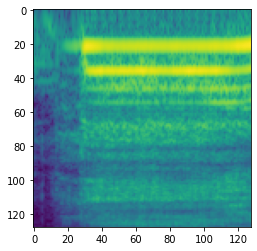

In [29]:
plt.imshow(np.transpose(data_x[12,:,:,0]))
print(np.max(data_x[12,:,:,0]))
print(np.min(data_x[12,:,:,0]))

In [27]:
#model.summary()
model=load_model("C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\models\\my_model1.h5")
#plot_model(model,show_shapes=True,expand_nested=True)

In [30]:
index=10
print(np.shape(np.expand_dims(data_x[index,:,:,:],0)))
print(np.shape(np.expand_dims(data_y[index,:],0)))
history=model.fit(data_x,data_y,epochs=200,verbose=1,validation_split=0.2,use_multiprocessing=True)

(1, 128, 128, 1)
(1, 5)
Train on 8400 samples, validate on 2100 samples
Epoch 1/200
8400/8400 [==============================] - 22s 3ms/sample - loss: 11.1313 - val_loss: 0.8200
Epoch 2/200
8400/8400 [==============================] - 20s 2ms/sample - loss: 0.1772 - val_loss: 1.1885
Epoch 3/200
8400/8400 [==============================] - 20s 2ms/sample - loss: 0.1180 - val_loss: 0.3005
Epoch 4/200
8400/8400 [==============================] - 20s 2ms/sample - loss: 0.1022 - val_loss: 0.1419
Epoch 5/200
8400/8400 [==============================] - 20s 2ms/sample - loss: 0.0956 - val_loss: 0.1035
Epoch 6/200
8400/8400 [==============================] - 20s 2ms/sample - loss: 0.0921 - val_loss: 0.0846
Epoch 7/200
8400/8400 [==============================] - 20s 2ms/sample - loss: 0.0900 - val_loss: 0.0845
Epoch 8/200
8400/8400 [==============================] - 20s 2ms/sample - loss: 0.0885 - val_loss: 0.0840
Epoch 9/200
8400/8400 [==============================] - 20s 2ms/sample - loss:

Text(0, 0.5, 'MSE')

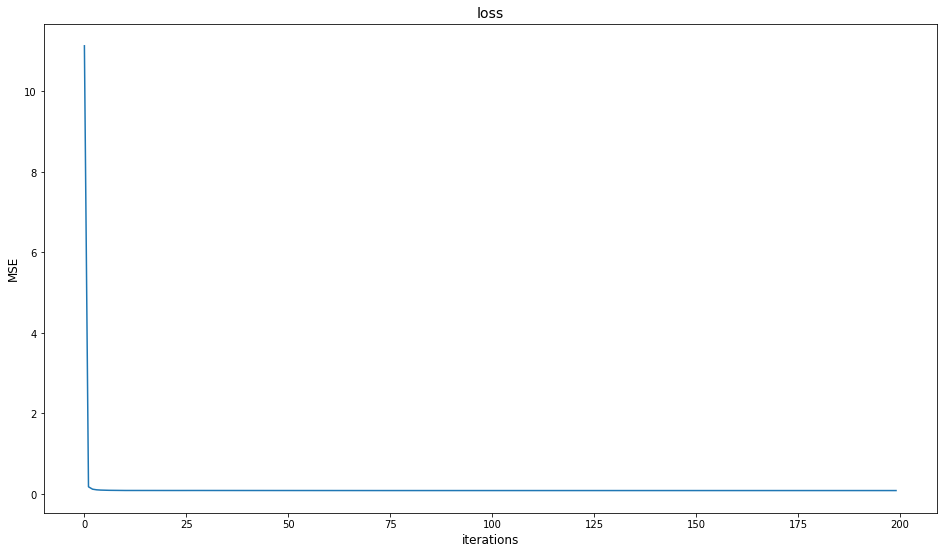

In [31]:
t=history.history['loss']
plt.figure(figsize=(16,9))
plt.plot([i for i in range(np.shape(t)[0])],t)
plt.title('loss',fontsize=14)
plt.xlabel('iterations',fontsize=12)
plt.ylabel('MSE',fontsize=12)
#plt.xlim([0,100])

In [33]:
#index=1950
print(np.shape(np.expand_dims(data_x[index],0)))
t=backend.function([model.input],[model.output])(np.expand_dims(data_x[index],0))
t_pred=np.squeeze(t).tolist()
t_true=np.squeeze(data_y[index]).tolist()
#t_input=np.squeeze(x_input).tolist()
print(t_pred)
print(t_true)

(1, 128, 128, 1)
[0.5057761669158936, 0.48674389719963074, 0.5252492427825928, 0.5123288035392761, 0.513637125492096]
[0.8852139304974624, 0.6099891220776417, 0.7663472253268746, 0.35160411240512307, 0.09126173431647217]


In [ ]:
model.save("C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\models\\my_model1_con.h5")

In [ ]:
import pickle
 
with open('C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\models\\trainHistory1_con.txt', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
    
#with open('trainHistoryDict.txt','rb') as file_pi:
#    history=pickle.load(file_pi)